In [2]:
#Machine LEarning: Generalizing from training examples to make accurate predictions on test examples.

#We first learn the model using observations (xi,yi) to make predictions about output.

#Goal: how do we create models to make predictions

#example model: linear regression

In [3]:
#simple linear regression=============


In [4]:
#single input , single output

In [5]:
#Let's build a model to predict beginning salary from exp using harris data

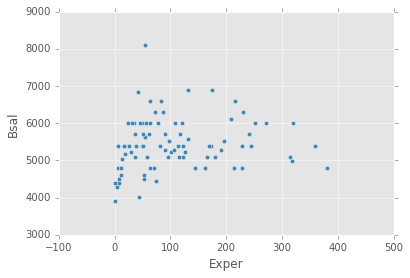

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use("ggplot")

import pandas as pd
data = pd.read_csv("/data/harris.csv")
data.plot.scatter(x="Exper", y = "Bsal")

In [8]:
# linear regression finds the line that fits the data the best.

In [9]:
#choosing best line:

# we want to minimize deviation between yi and sum of squares

# see paper motes for linear regression formula exercise. Wk7 dy 2

In [10]:
def fit_linear_regression(x,y):
    xc = x - x.mean()
    yc = y - y.mean()
    slope = (xc * yc).sum() / (xc ** 2).sum()
    intercept = y.mean() - slope * x.mean()
    return slope, intercept

In [11]:
fit_linear_regression(data['Exper'],data['Bsal'])

(1.3009438456012228, 5289.0216755830697)

In [12]:
#every month of exp = 1.3 $ increase in start salary

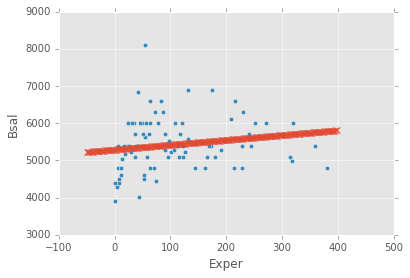

In [15]:
import numpy as np
x = np.arange(-50,400)
y = 5289 + 1.3 * x
data.plot.scatter(x = 'Exper', y = 'Bsal')
plt.plot(x,y, 'x-')

In [17]:
#how to do this without knowing derivation..use a package!

#machine learning package : scikit-learn

#does all the math in background

#seaborn style auto plot reg line

In [18]:
from sklearn import linear_model
model = linear_model.LinearRegression()
#model.fit(X,y) # X is a matrix!

In [19]:
model.fit(data[['Exper']], data['Bsal']) #wrap in extra brackets for matrix

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
model.coef_

array([ 1.30094385])

In [21]:
model.intercept_

5289.0216755830697

In [22]:
#why the underscores: creators put it there to remind us that it was estimated from data

In [23]:
#Multiple linear regression==================================================================================

In [24]:
# y = b0 + b1x1 + b2x2 +.. + bpxp

#p = number of vars in reg model

#Instead of fitting a line, it's fitting a plane to data

#If p > 2, it's greater than 3D, but can still do the math

In [25]:
# Ex: use scikit learn to fit a linear model that predicts beginning salary based on age, edu , and experience.

In [45]:

model.fit(data[['Age','Educ','Exper']], data['Bsal'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
model.coef_

array([  -0.53989234,  129.86644638,    2.29477563])

In [47]:
model.intercept_

3820.8117782642521

In [31]:
#coef for age interpretation:

#holding other var constnt, for ea additional year of age, salary goes down by $0.5; age discrimination

#coef for education:

#holding other vars constant, for ea additional educ, can be expected to earn $130 for begin salary

#coef for experience:

#holding every thing else constant; for every month of exp, can expect to earn $2 more

In [32]:
#Tricks============================================================for mult regression

In [48]:
#fitting curved data:

#can use linear regression:

data['Exper^2'] = data['Exper'] ** 2
data['Exper^3'] = data['Exper'] ** 3

In [60]:
model.fit(data[[ 'Exper', 'Exper^2', 'Exper^3' ]], data['Bsal'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

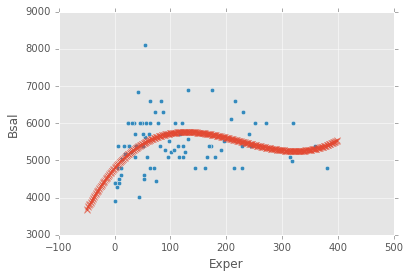

In [62]:
import numpy as np
x = np.arange(-50,400)
y = model.intercept_ + model.coef_[0] * x + \
    model.coef_[1] * x**2 + \
    model.coef_[2] * x**3
data.plot.scatter(x = 'Exper', y = 'Bsal')
plt.plot(x,y, 'x-')

In [51]:
# categorical predictors

data['Male'] = (data['Sex'] == 'Male') * 1.0

In [52]:
model.fit(data[['Age','Male','Educ','Exper']], data['Bsal'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
model.coef_

array([  1.19123529e+00,   7.65430855e+02,   9.21442753e+01,
         1.38447099e-03])

In [54]:
#holding other var constant, males make 7.6.. more

In [55]:
data['Female'] = (data['Sex'] == 'Female') * 1.0

In [56]:
model.fit(data[['Age','Female','Educ','Exper']], data['Bsal'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
model.coef_

array([  1.19123529e+00,  -7.65430855e+02,   9.21442753e+01,
         1.38447099e-03])

In [58]:
#how about cat vars with more than two levels like hair color?

#ea row of vectors can only have one '1'



In [59]:
pd.get_dummies(data['Sex'])

,Female,Male
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
...,...,...
86,1.0,0.0
87,1.0,0.0
